__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

In [1]:
function derivada_simetrica(f,x0,h)  #creamos la función derivada simétrica vista en clases pasadas
    D = (f(x0+h)-f(x0-h))./(2*h)    # aproximaciones a la derivada.
    return D                       # La salida es la derivada
end;

function newton(g,x0,h)
    dg(z) = derivada_simetrica(g,z,h)  # Usando la función anterior derivada simetrica.
    x = x0;                            # Con condición inicial x0
    
    for i in 1:10
        x = x-g(x)/dg(x)               # Nueva aproximación de la raíz dada por el método de Newton.
    end
    return x                           # La salida de la función es la aproximación a la raíz de f.
    
end;

function fijo(f,x0)     #funcion para el punto fijo aiterar
    
    x = x0         # Condición inicial.
    for i in 1:20
        x = f(x)   # Iteraciones para aproximar el punto fijo.
    end
    
    return x       # Regresa una aproximación del punto fijo.
    
end;

In [2]:
function EulerImplicito(f,x0,listt,metodo)
    n = length(listt)   # N° elementos de la lista listt.
    listx = zeros(n)                   
    listx[1] = x0       #Colocamos la condición inicial x=x0.
    h = listt[2]-listt[1]                
    for k in 1:n-1
        xk = listx[k]                    
        t = listt[k+1]                  
        if metodo == "newton"
            g(z) = z - xk - h*f(z,t)     #g es la función a la que queremos encontrar su raíz x_(k+1).
            listx[k+1] = newton(g,xk,h)  
        elseif metodo == "fijo"
            G(z) = xk + h*f(z,t)
            listx[k+1] = fijo(G,xk)     
       
        end
    end
    return listx                         
end

EulerImplicito (generic function with 1 method)

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.
$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n+1/2}\right).$$
en donde $\displaystyle t_{k+\frac{1}{2}}=t_{k}+\frac{h}{2}$. Mientras que $\displaystyle\tilde{x}_{k+\frac{1}{2}}=x_{k}+\frac{h}{2}f(x_{k},t_{k})$.


In [3]:
function puntomedio(f,x0,listt)
    
    n = length(listt)                               # Número de elementos de la lista listt.
    listx = zeros(n)                                # la lista listx, guarda los valores de x
    listx[1] = x0                                   # El primer elemento es la condición inicial x0.
    l = (listt[2]-listt[1])/2.0                     # l es la mitad del paso h.
    for k in 1:n-1
        x = listx[k] + l*f(listx[k],listt[k])       # Aproximación de x_{k+1/2}.
        listx[k+1] = listx[k] + 2l*f(x,listt[k]+l)  # Aproximación de x_{k+1}
    end
    
    return listx
    
end;

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [4]:
#La función recibe g(x,t), condición inicial a, primer tiempo t1, último tiempo tf y el tamaño de cada subintervalo h
function RK4(g, a, ti, tf, h)
    #timeArray es el tiempo dividido en round((tf-ti)/h) 
    #xArrayarreglo de puros ceros
    timeArray = linspace(ti, tf, round((tf-ti)/(h)));
    xArray = zeros(length(timeArray));
    #El primer elemento de xArray es la condición inicial X=X0
    xArray[1] = a;
    #En el for se calculan los ks de Runge-Kutta y 
    for i in 1:length(timeArray)-1
        k1 = g(xArray[i], timeArray[i]);
        k2 = g(xArray[i]+(h/2)*k1, timeArray[i]+(h/2));
        k3 = g(xArray[i]+(h/2)*k2, timeArray[i]+(h/2));
        k4 = g(xArray[i]+h*k3, timeArray[i+1]);
        xArray[i+1] = xArray[i]+(h/6)*(k1+2*k2+2*k3+k4);
    end
    return timeArray, xArray; 
end;


Ejercicio 4: Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. Nota: Este es el test para el método de Euler implícito.
$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$
para los pasos $h=1.0,0.5,0.2,0.01$.

In [5]:
f(x,t)=-2.5x;

In [6]:
Pkg.update() # Actualiza la lista de paquetes de Julia.

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In [7]:
Pkg.add("PyPlot") # mas adelante lo usaremos, mientras tanto podemos llamarlo:

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In [8]:
using PyPlot

In [9]:
listt1=0:0.5:8                    #Lista entre el intervalo (0,8) con h=0.5.
listt2=0:0.2:8                    #Lista entre el intervalo (0,8) con h=0.2.
listt3=0:0.01:8                   #Lista entre el intervalo (0,8) con h=0.01.
listt4=0:1:8;        
E1=EulerImplicito(f,1,listt1,"newton")  #x0=1 para cada S1N.
E2=EulerImplicito(f,1,listt2,"newton")
E3=EulerImplicito(f,1,listt3,"newton")
E4=EulerImplicito(f,1,listt4,"newton");  # Condición inicial x0=1.

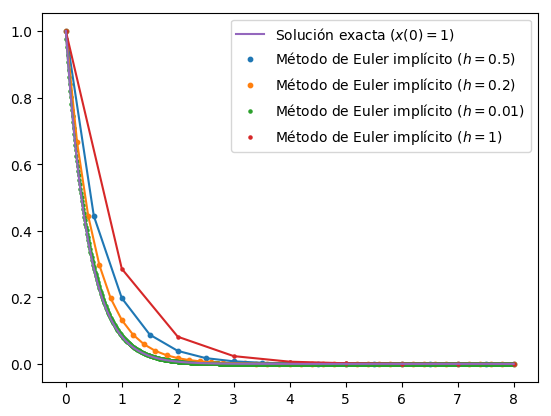

In [10]:
scatter(listt1,E1,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(listt1,E1)
scatter(listt2,E2,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(listt2,E2)
scatter(listt3,E3,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(listt3,E3)
scatter(listt4,E4,label=L"Método de Euler implícito ($h=1$)",s=5)
plot(listt4,E4)
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

Para $h=1$: método de Euler no converge a la solución, con el método implícito sí. Para $h=0.5$ el método de Euler converge, pero no es tan buena aproximación , mientras que en el método implícito lo hace mejor. Las demás $h$ ocacionan mejor convergencia en métodos .

Ejercicio 5: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. Nota: Este es el test para el de Runge-Kutta.

In [11]:
h(x,t)=(2x-18t)/(1+t) #función del ejercicio.
list1=0:0.5:12 #t=0.5
list2=0:0.2:12 #t=0.2
list3=0:0.01:12 #t=0.1
list4=0:0.001:12 #t=0.001
PM1=puntomedio(h,4.0,list1) #Usando la lista de arriba (con cada h diferente) apliquemos el método del punto medio considerando x(0)=4.0
PM2=puntomedio(h,4.0,list2)
PM3=puntomedio(h,4.0,list3)
PM4=puntomedio(h,4.0,list4)

12001-element Array{Float64,1}:
    4.0    
    4.008  
    4.01598
    4.02396
    4.03192
    4.03988
    4.04782
    4.05576
    4.06368
    4.0716 
    4.0795 
    4.0874 
    4.09528
    ⋮      
 -618.768  
 -618.88   
 -618.992  
 -619.104  
 -619.216  
 -619.328  
 -619.44   
 -619.552  
 -619.664  
 -619.776  
 -619.888  
 -620.0    

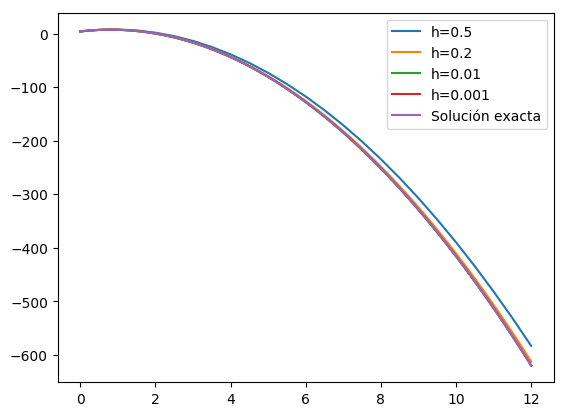

PyObject <matplotlib.legend.Legend object at 0x7fd611c10550>

In [12]:
plot(list1,PM1,label="h=0.5") ## Grafiquemos las soluciones
plot(list2,PM2,label="h=0.2")
plot(list3,PM3,label="h=0.01")
plot(list4,PM4,label="h=0.001")
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución exacta")
legend()

In [13]:
#Se solución del problema con h(x,t)
function S(t)
    return 4+8*t-5*(t*t);
end;

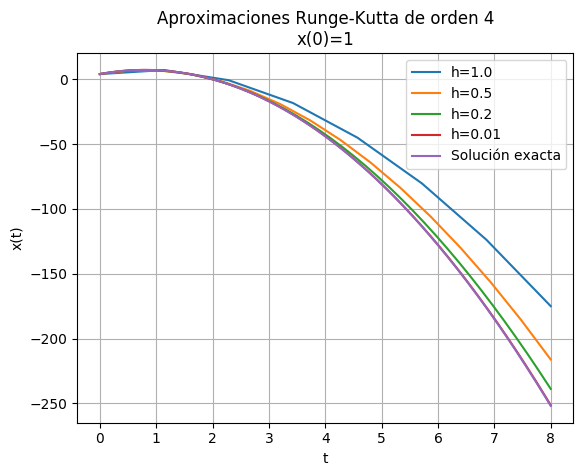

In [14]:
#Se aplica Runge-Kutta de orden 4, para  x(0)=4 en h
(timeArray1, xArray1) = RK4(h, 4.0, 0.0, 8.0, 1.0);
(timeArray2, xArray2) = RK4(h, 4.0, 0.0, 8.0, 0.5);
(timeArray3, xArray3) = RK4(h, 4.0, 0.0, 8.0, 0.2);
(timeArray4, xArray4) = RK4(h, 4.0, 0.0, 8.0, 0.01);
xlabel("t");
ylabel("x(t)");
title("Aproximaciones Runge-Kutta de orden 4\nx(0)=1");
grid("on");
plot(timeArray1, xArray1, label="h=1.0");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, S.(timeArray4), label="Solución exacta");
legend();

Ejercicio 6: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

In [15]:
#Euler para varias variables visto en clase.
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [16]:
#Se define la función para resolver con k=1 y m=1, que surge de resolver d2x/dt2=x
l(x,t)=[x[2], -1.0*x[1]]

l (generic function with 1 method)

In [17]:
#Se graficará sobre el intervalo [0,8] con h = 0.1
list=0:0.1:8;
#En vec se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=euler(l,list,[0,2]);

In [18]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1euler=map(x->x[1],vec);
listx2euler=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

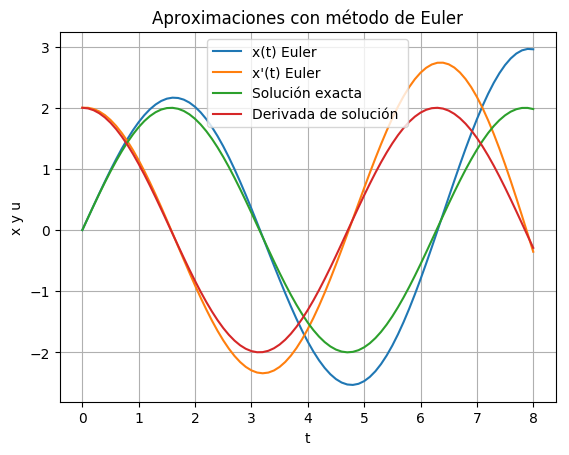

In [19]:
#aproximaciones y las soluciones exactas
xlabel("t")
ylabel("x y u")
title("Aproximaciones con método de Euler")
grid("on")
plot(list,listx1euler, label="x(t) Euler");
plot(list,listx2euler, label="x'(t) Euler");
plot(list,listxreal, label="Solución exacta");
plot(list,listxdotreal, label="Derivada de solución ");
legend();

In [20]:
#Método de Runge-Kutta de orden 4 para varias variables... Utilizando como BASE lo que dio el Profesor
function RK(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end

RK (generic function with 1 method)

In [21]:
#Se graficará sobre el intervalo [0,8] con h = 0.1
list=0:0.1:8;
#En vec se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=RK(l,list,[0,2]);

In [22]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1rk=map(x->x[1],vec);
listx2rk=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

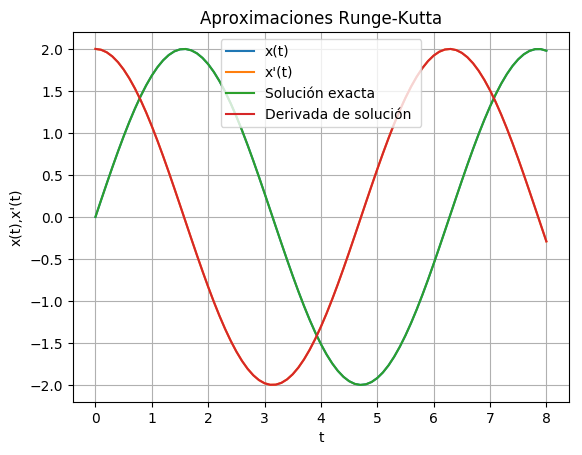

In [23]:
#Se grafican las aproximaciones y las soluciones teóricas
xlabel("t")
ylabel("x(t),x'(t)")
title("Aproximaciones Runge-Kutta")
grid("on")
plot(list,listx1rk, label="x(t)");
plot(list,listx2rk, label="x'(t)");
plot(list,listxreal, label="Solución exacta");
plot(list,listxdotreal, label="Derivada de solución ");
legend();

In [24]:
#La energía es constante, E=0.5*x^2+0.5xdot^2, ya que m=k=1.entonces E=2
function cnt(x,t)
    return 2;
end;

#soluciones numéricas, siguiendo que E=0.5*x^2+0.5xdot^2
function energia(x,y)
    return 0.5*x*x+0.5y*y;
end;

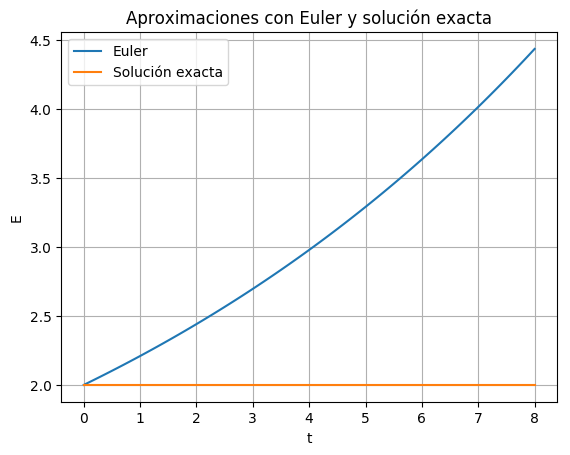

In [25]:
#Se grafican las aproximaciones y la solución teórica para la energía del oscilador armónico
xlabel("t")
ylabel("E")
title("Aproximaciones con Euler y solución exacta")
grid("on")
plot(list,energia.(listx1euler, listx2euler), label="Euler");
plot(list,cnt.(list,list), label="Solución exacta");
legend();

_Hay una diferencia entre la solución exacta y la aprox de Euler._

Ejercicio 7: Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

In [26]:
#Se utilizará el intervalo [0,100] con h = 0.01
list=0:0.01:100;
#En vec se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=euler(l,list,[0,2]);

In [27]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1euler=map(x->x[1],vec);
listx2euler=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

In [28]:

#Se utilizará el intervalo [0,100] con h = 0.01
list=0:0.01:100;
#En vec se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=RK(l,list,[0,2]);

In [29]:
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx1rk=map(x->x[1],vec);
listx2rk=map(x->x[2],vec);
listxreal=2*sin.(list); 
listxdotreal=2*cos.(list);

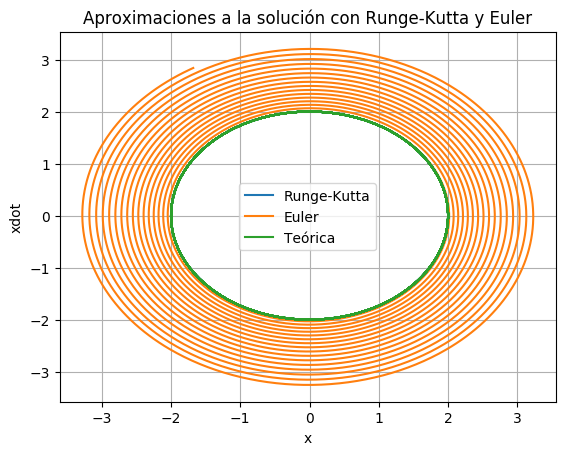

In [30]:
#Se grafican las aproximaciones y las soluciones teóricas
xlabel("x")
ylabel("xdot")
title("Aproximaciones a la solución con Runge-Kutta y Euler")
grid("on")
plot(listx1rk,listx2rk, label="Runge-Kutta");
plot(listx1euler,listx2euler, label="Euler");
plot(listxreal,listxdotreal, label="Teórica");
legend();


Ejercicio 8: Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [39]:
#Se utilizará el intervalo [0,100] con h = 0.01
list=0:0.01:100;
#En vec se guardan las soluciones con Runge-Kutta y se dan varias condiciones iniciales
vec1=RK(l,list,[2,3]);
vec2=RK(l,list,[3,3.5]);
vec3=RK(l,list,[4.5,2.2]);
vec4=RK(l,list,[5,3]);


In [40]:
#Se guardan las soluciones en dos lists por condición inicial
listx1rk1=map(x->x[1],vec1);
listx2rk1=map(x->x[2],vec1);
listx1rk2=map(x->x[1],vec2);
listx2rk2=map(x->x[2],vec2);
listx1rk3=map(x->x[1],vec3);
listx2rk3=map(x->x[2],vec3);
listx1rk4=map(x->x[1],vec4);
listx2rk4=map(x->x[2],vec4);

listxreal1=cos.(list)+2*sin.(list); 
listxdotreal1=-sin.(list)+2*cos.(list);
listxreal2=2*cos.(list)+2.5*sin.(list); 
listxdotreal2=-2*sin.(list)+2.5*cos.(list);
listxreal3=3.5*cos.(list)+1.2*sin.(list); 
listxdotreal3=-3.5*sin.(list)+1.2*cos.(list);
listxreal4=4*cos.(list)+2*sin.(list); 
listxdotreal4=-4*sin.(list)+2*cos.(list);

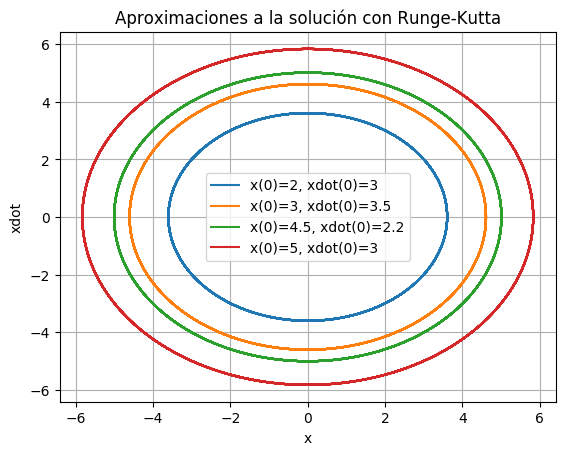

In [41]:
#Se grafican las aproximaciones con Runge-Kutta
xlabel("x")
ylabel("xdot")
title("Aproximaciones a la solución con Runge-Kutta")
grid("on")
plot(listx1rk1,listx2rk1, label="x(0)=2, xdot(0)=3");
plot(listx1rk2,listx2rk2, label="x(0)=3, xdot(0)=3.5");
plot(listx1rk3,listx2rk3, label="x(0)=4.5, xdot(0)=2.2");
plot(listx1rk4,listx2rk4, label="x(0)=5, xdot(0)=3");
legend();

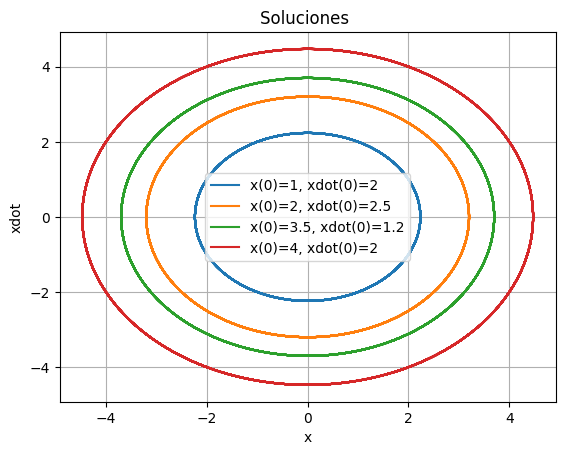

In [42]:
xlabel("x")
ylabel("xdot")
title("Soluciones a diferentes condiciones iniciales ")
grid("on")
plot(listxreal1,listxdotreal1, label="x(0)=1, xdot(0)=2");
plot(listxreal2,listxdotreal2, label="x(0)=2, xdot(0)=2.5");
plot(listxreal3,listxdotreal3, label="x(0)=3.5, xdot(0)=1.2");
plot(listxreal4,listxdotreal4, label="x(0)=4, xdot(0)=2");
legend();